Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Confusion Matrix:


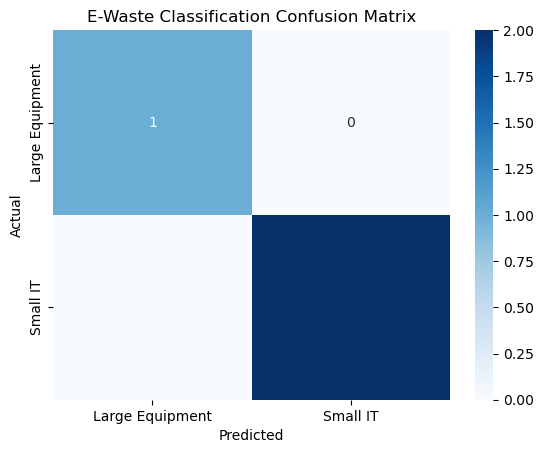

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'Device_Type': ['Phone', 'Laptop', 'TV', 'Printer', 'Tablet', 'Phone', 'TV', 'Laptop', 'Printer', 'Tablet'],
    'Weight_kg': [0.2, 2.5, 8.0, 6.0, 0.5, 0.25, 7.8, 2.8, 5.5, 0.6],
    'Age_Years': [2, 4, 6, 3, 2, 1, 7, 5, 4, 2],
    'E_Waste_Category': ['Small IT', 'Small IT', 'Large Equipment', 'Large Equipment', 'Small IT',
                         'Small IT', 'Large Equipment', 'Small IT', 'Large Equipment', 'Small IT']
}

# Create DataFrame
df = pd.DataFrame(data)

# Label Encoding
le_device = LabelEncoder()
df['Device_Type'] = le_device.fit_transform(df['Device_Type'])

le_category = LabelEncoder()
df['E_Waste_Category'] = le_category.fit_transform(df['E_Waste_Category'])

# Split features and target
X = df[['Device_Type', 'Weight_kg', 'Age_Years']]
y = df['E_Waste_Category']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_category.classes_,
            yticklabels=le_category.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('E-Waste Classification Confusion Matrix')
plt.show()
